**IMPORTING LIBRARIES**

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

**LOADING DATASET**

In [3]:
df= pd.read_csv('/content/sentiment_tweets3.csv')

In [4]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [5]:
df.tail()

,Index,message to examine,label (depression result)
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1
10313,802313,0,1


In [6]:
df.shape

(10314, 3)

In [10]:
df.describe()

,Index,label (depression result)
count,10314.000000,10314.000000
mean,491253.470525,0.224355
std,261688.134407,0.417177
min,106.000000,0.000000
25%,263019.250000,0.000000
50%,514988.000000,0.000000
75%,773521.500000,0.000000
max,802313.000000,1.000000


In [11]:
df.drop('Index', axis=1, inplace = True)

**WORDCLOUD GENERATION**

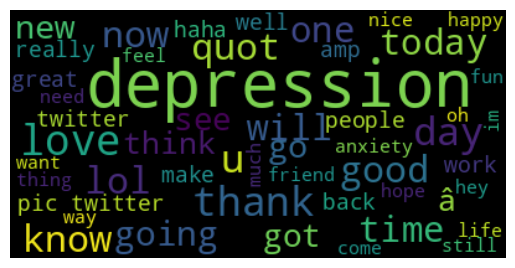

In [12]:
text = ' '.join(df['message to examine'])
wordcloud = WordCloud(max_words=50).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 0, "['label (depression result)']")

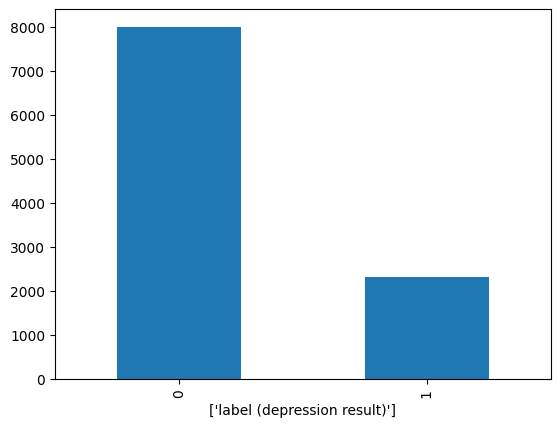

In [17]:
df.groupby('label (depression result)').size().plot(kind='bar')
plt.xlabel('Label (Depression Result)')
plt.xlabel(x_label)

In [18]:
for i in range(10):
    print(df['message to examine'][i], "\n")

just had a real good moment. i missssssssss him so much,  

is reading manga  http://plurk.com/p/mzp1e 

@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8  

@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.  

ADD ME ON MYSPACE!!!  myspace.com/LookThunder 

so sleepy. good times tonight though  

@SilkCharm re: #nbn as someone already said, does fiber to the home mean we will all at least be regular now  

23 or 24ï¿½C possible today. Nice  

nite twitterville  workout in the am  -ciao 

@daNanner Night, darlin'!  Sweet dreams to you  



**TEXT NORMALIZATION**

In [19]:
 df['clean_message'] = df['message to examine'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]+', ' ', x))
df['clean_message'] = df['message to examine'].apply(lambda x: re.sub(r'http\S+', ' ', x))

df.head()

,message to examine,label (depression result),clean_message
0,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...
1,is reading manga http://plurk.com/p/mzp1e,0,is reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder


**STOPWORD REMOVAL**

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
stop_words = set(stopwords.words('english'))
df['clean_message'] = df['clean_message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [22]:
df.head()

,message to examine,label (depression result),clean_message
0,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,"
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need send 'em accountant tomorrow. Odd...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder


In [23]:
df['clean_message'] = df['clean_message'].str.lower()
df.head()

,message to examine,label (depression result),clean_message
0,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,"
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder


**WORD TOKENIZATION**

In [24]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
df['tokenized_clean_message'] = df['clean_message'].apply(word_tokenize)
df.head()

,message to examine,label (depression result),clean_message,tokenized_clean_message
0,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,","[real, good, moment, ., missssssssss, much, ,]"
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga,"[reading, manga]"
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,"[@, comeagainjen, -]"
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...,"[@, lapcat, need, send, 'em, accountant, tomor..."
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,"[add, me, on, myspace, !, !, !, myspace.com/lo..."


**WORD LEMMATIZATION**

In [26]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [27]:
lemmatizer = WordNetLemmatizer()

df['lemmatized_tokenized_clean_message'] = df['tokenized_clean_message'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

df.head()

,message to examine,label (depression result),clean_message,tokenized_clean_message,lemmatized_tokenized_clean_message
0,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,","[real, good, moment, ., missssssssss, much, ,]","[real, good, moment, ., miss, much, ,]"
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga,"[reading, manga]","[reading, manga]"
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,"[@, comeagainjen, -]","[@, comeagainjen, -]"
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...,"[@, lapcat, need, send, 'em, accountant, tomor...","[@, lapcat, need, send, 'em, accountant, tomor..."
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,"[add, me, on, myspace, !, !, !, myspace.com/lo...","[add, me, on, myspace, !, !, !, myspace.com/lo..."


In [28]:
df['lemmatized_text'] = df['lemmatized_tokenized_clean_message'].apply(lambda x: ' '.join(x))
df.head()

,message to examine,label (depression result),clean_message,tokenized_clean_message,lemmatized_tokenized_clean_message,lemmatized_text
0,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,","[real, good, moment, ., missssssssss, much, ,]","[real, good, moment, ., miss, much, ,]","real good moment . miss much ,"
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga,"[reading, manga]","[reading, manga]",reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,"[@, comeagainjen, -]","[@, comeagainjen, -]",@ comeagainjen -
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...,"[@, lapcat, need, send, 'em, accountant, tomor...","[@, lapcat, need, send, 'em, accountant, tomor...",@ lapcat need send 'em accountant tomorrow . o...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,"[add, me, on, myspace, !, !, !, myspace.com/lo...","[add, me, on, myspace, !, !, !, myspace.com/lo...",add me on myspace ! ! ! myspace.com/lookthunder


**LIBRARIES  FOR MACHINE LEARNING ALGORITHMS**

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, confusion_matrix


**SPLITTING DATA**



In [31]:
X = df["lemmatized_text"]
y = df["label (depression result)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

tfidf = TfidfVectorizer()
logistic_regression = LogisticRegression()
naive_bayes = MultinomialNB()
decision_tree = DecisionTreeClassifier()
support_vector_machine = SVC()

**LOGISTIC REGRESSION**

In [32]:
lr= Pipeline([("tfidf", tfidf), ("logistic_regression", logistic_regression)])
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracylr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracylr)

Logistic Regression Accuracy: 0.9893410852713178


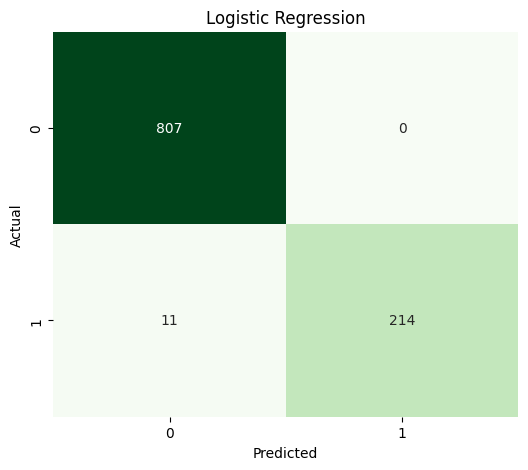

In [35]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot the confusion matrix for Logistic Regression
plot_confusion_matrix(cm_lr, 'Logistic Regression')

**NAIVE BAYES**

In [36]:
nb = Pipeline([("tfidf", tfidf), ("naive_bayes", naive_bayes)])
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracynb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracynb)

Naive Bayes Accuracy: 0.9108527131782945


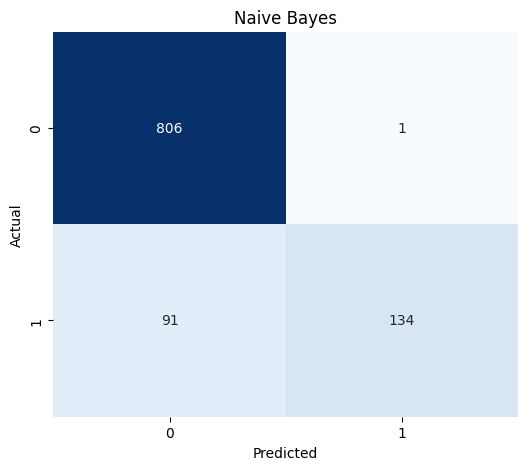

In [37]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
plot_confusion_matrix(cm_nb, 'Naive Bayes')

**DECISION TREE**

In [38]:
dt = Pipeline([("tfidf", tfidf), ("decision_tree", decision_tree)])
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracydt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracydt)

Decision Tree Accuracy: 0.9573643410852714


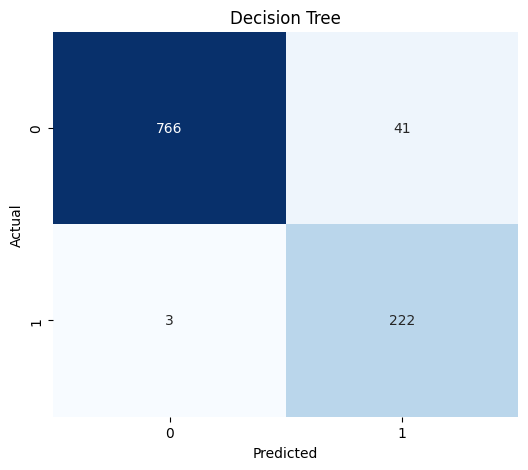

In [41]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
plot_confusion_matrix(cm_dt, 'Decision Tree')

**SUPPORT VECTOR MACHINE**

In [42]:
svm = Pipeline([("tfidf", tfidf), ("support_vector_machine", support_vector_machine)])
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracysvm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracysvm)

SVM Accuracy: 0.9961240310077519


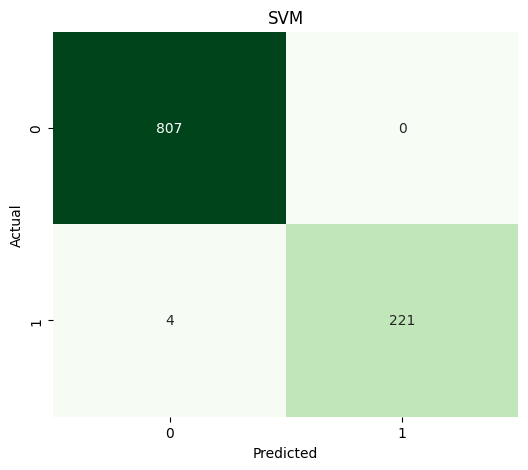

In [44]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
plot_confusion_matrix(cm_svm, 'SVM')

In [45]:
models = ["Logistic Regression", "Naive Bayes", "Decision Tree", "SVM"]
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

for model, y_pred in zip([lr, nb, dt, svm], [y_pred_lr, y_pred_nb, y_pred_dt, y_pred_svm]):
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)

    roc_aucs.append(roc_auc_score(y_test, y_pred_proba))

metrics_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1-score": f1_scores,
    "ROC-AUC": roc_aucs
})

metrics_df.head()

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.989341,0.989484,0.989341,0.989244,0.996784
1,Naive Bayes,0.910853,0.919054,0.910853,0.902064,0.974892
2,Decision Tree,0.957364,0.962961,0.957364,0.958510,0.967931
3,SVM,0.996124,0.996143,0.996124,0.996111,0.995368


<ipython-input-47-9a69f9bc5975>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=metrics_df, palette=palette, ax=axes[0, 0])
<ipython-input-47-9a69f9bc5975>:4: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.barplot(x="Model", y="Accuracy", data=metrics_df, palette=palette, ax=axes[0, 0])
<ipython-input-47-9a69f9bc5975>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Precision", data=metrics_df, palette=palette, ax=axes[0, 1])
<ipython-input-47-9a69f9bc5975>:8: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.barplot(x="Model", y="Precision", d

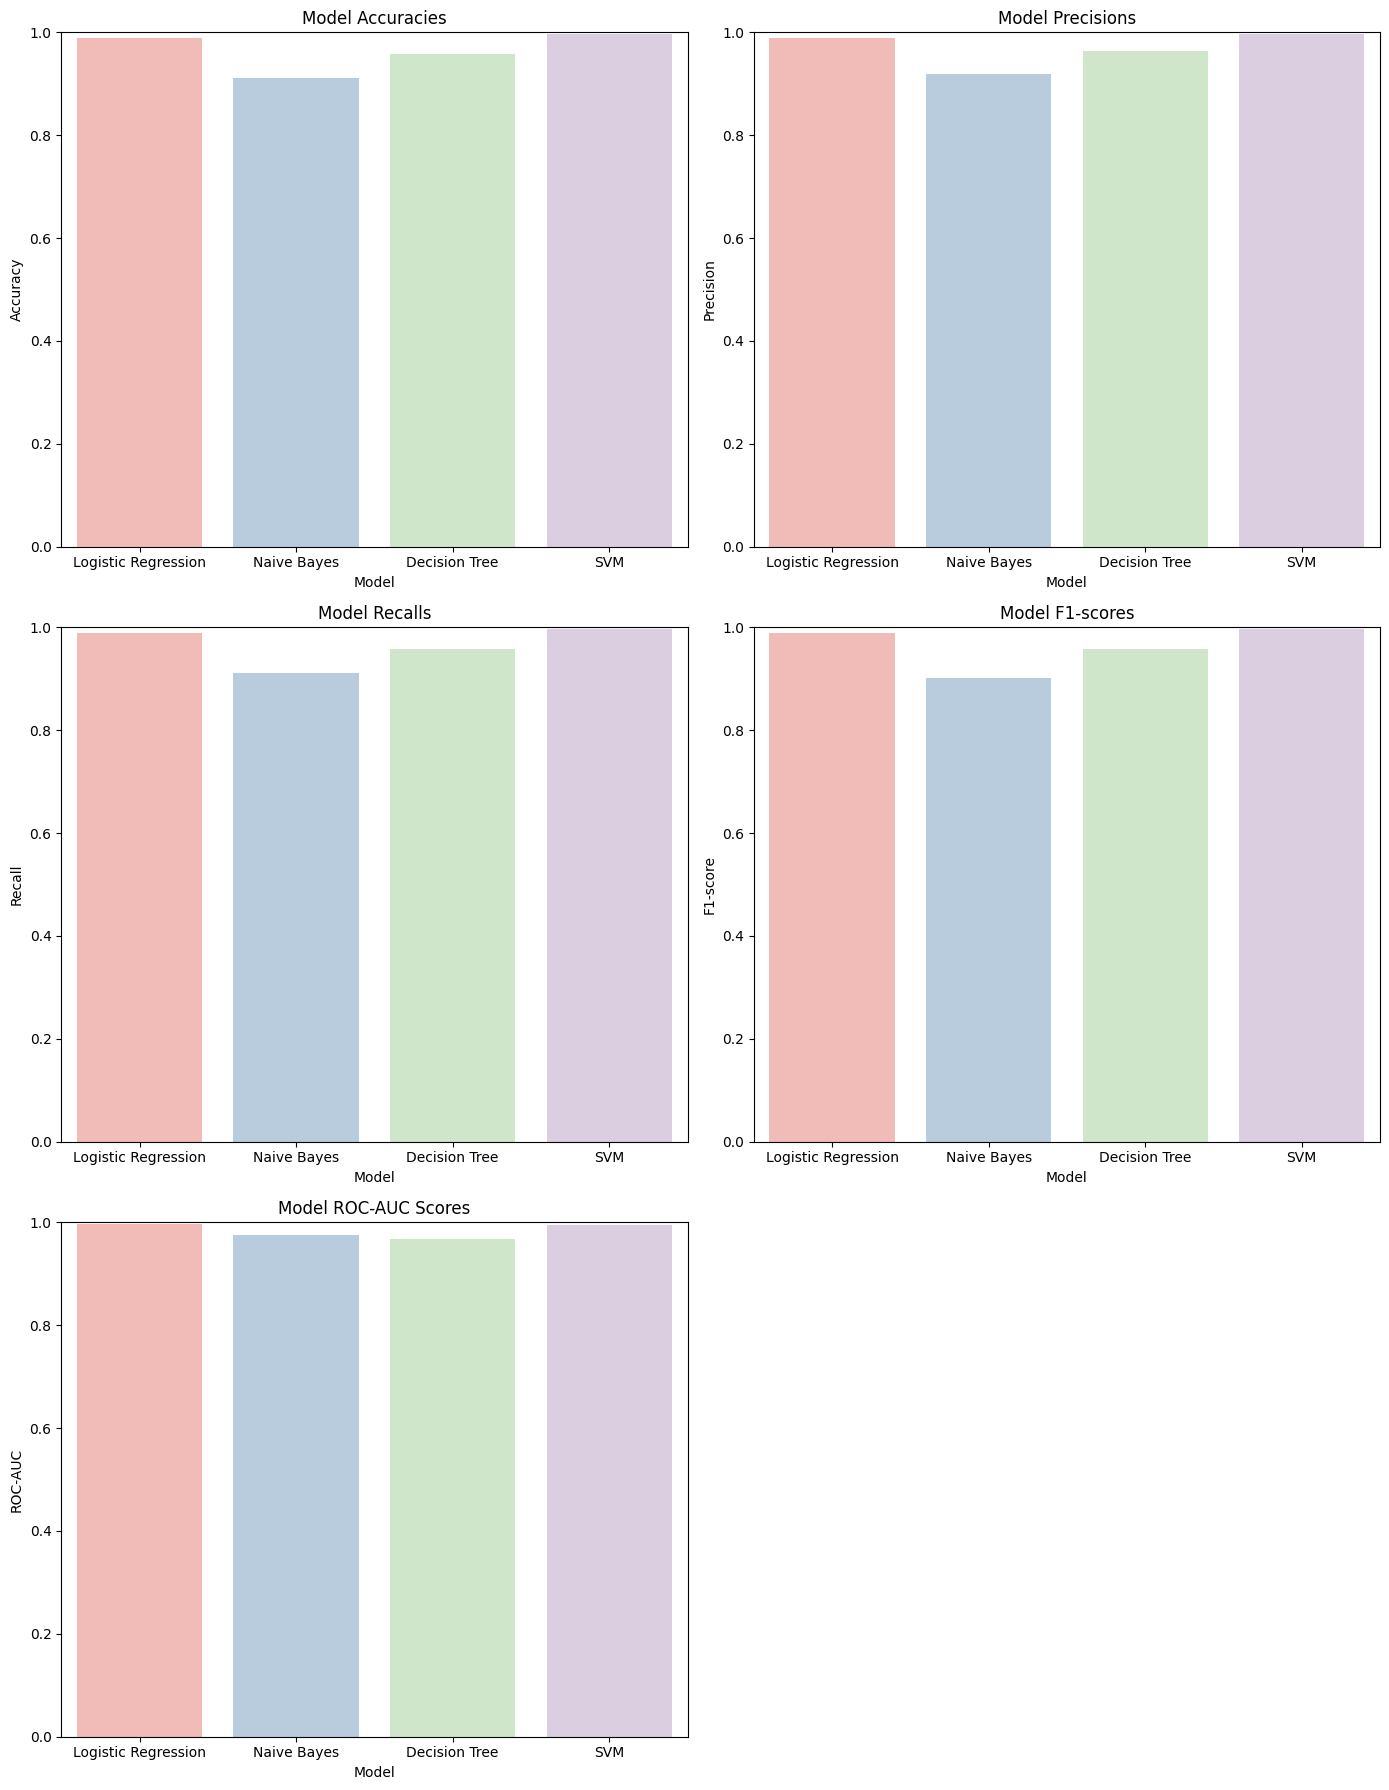

In [47]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
palette = sns.color_palette("Pastel1")

sns.barplot(x="Model", y="Accuracy", data=metrics_df, palette=palette, ax=axes[0, 0])
axes[0, 0].set_title("Model Accuracies")
axes[0, 0].set_ylim(0, 1)

sns.barplot(x="Model", y="Precision", data=metrics_df, palette=palette, ax=axes[0, 1])
axes[0, 1].set_title("Model Precisions")
axes[0, 1].set_ylim(0, 1)

sns.barplot(x="Model", y="Recall", data=metrics_df, palette=palette, ax=axes[1, 0])
axes[1, 0].set_title("Model Recalls")
axes[1, 0].set_ylim(0, 1)

sns.barplot(x="Model", y="F1-score", data=metrics_df, palette=palette, ax=axes[1, 1])
axes[1, 1].set_title("Model F1-scores")
axes[1, 1].set_ylim(0, 1)

sns.barplot(x="Model", y="ROC-AUC", data=metrics_df, palette=palette, ax=axes[2, 0])
axes[2, 0].set_title("Model ROC-AUC Scores")
axes[2, 0].set_ylim(0, 1)


fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

**ROC CURVES**

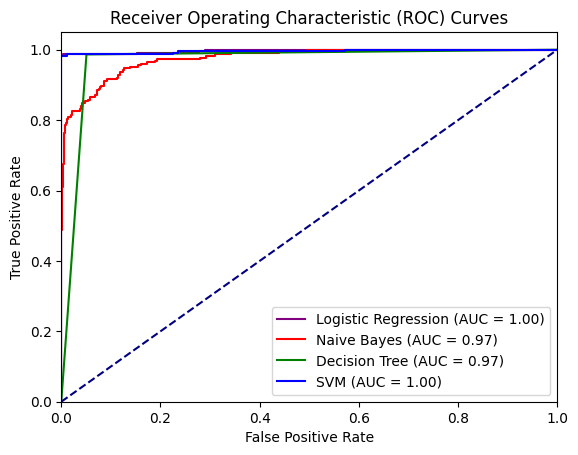

In [48]:
colors = ['purple', 'red', 'green', 'blue']

for model, label, color in zip([lr, nb, dt, svm], models, colors):
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f'{label} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")

plt.show()

**MODEL PERFORMANCE METRICS**

In [49]:
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0  Logistic Regression  0.989341   0.989484  0.989341  0.989244  0.996784
1          Naive Bayes  0.910853   0.919054  0.910853  0.902064  0.974892
2        Decision Tree  0.957364   0.962961  0.957364  0.958510  0.967931
3                  SVM  0.996124   0.996143  0.996124  0.996111  0.995368


**FINDINGS**

**Best Performing Model:**

The SVM model achieved the highest scores in most metrics, including Accuracy, Precision, Recall, and F1 Score, making it the most effective model for detecting depression in tweets.

**Logistic Regression:**

This model demonstrated strong accuracy compared to the other models (Naive Bayes and Decision Tree) and is quite close to the performance of the SVM.

**Naive Bayes:**

This model exhibited the lowest scores in accuracy, precision, and recall among all models.

**Decision Tree:**

While this model performed better than Naive Bayes, its accuracy is still slightly lower than that of the SVM and Logistic Regression.